In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 
# %matplotlib notebook

import ipysh

%aimport models.base

import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport Dataset_QSH
%aimport models.AEFIT5
%aimport models.Compose
%aimport models.GAN3

import livelossplot.keras
class PlotLossesCallback(livelossplot.keras.PlotLossesCallback):
    def on_train_batch_begin(self, a, b): pass
    def on_train_batch_end(self, a, b): pass
    def on_test_begin(self, a): pass
    def on_test_end(self, a): pass
    def on_test_batch_begin(self, a, b): pass
    def on_test_batch_end(self, a, b): pass

    
class PlotRelevanceCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(13, 3)
        w = self.model.layers[0].weights
        ax1.bar(range(0,4), w[0][0:4])
        labels = ['Ip','NS','Vt','F']
        plt.sca(ax1)
        plt.xticks(range(0,4), labels, fontsize=10)
        ax2.bar(range(7,17), w[0][4:14])
        plt.sca(ax2)
        plt.xticks(range(7,17), fontsize=10)        
        ax3.bar(range(7,17), w[0][14:24])
        plt.sca(ax3)
        plt.xticks(range(7,17), fontsize=10)       


# ipysh.Bootstrap_support.debug()

Hunch models imported
reload set for module  Hunch_utils
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


Using TensorFlow backend.


#  BR rm rs


In [45]:
qsh = Dataset_QSH.Dataset_QSH()
import os
# file = ipysh.abs_builddir+'/te_db_r15_clean_shuffle.npy'
file = ipysh.abs_builddir+'/te_db_r15u_shuffle.npy'
try: qsh.load(file)
except: raise FileNotFoundError

# qsh.shuffle()
qsh.dim = None
qsh.set_null(np.nan)
qsh.set_normal_positive(['prel','te','tbordo','tcentro', 'Ip','NS','VT','F','absBr_rm','argBr_rm','absBr_rs','argBr_rs']) 
print("QSH rebalanced 15 points size: ", len(qsh))


QSH rebalanced 15 points size:  47567


In [46]:
def _map(xy,p,Br):
    pBr = tf.concat([p,Br], axis=0)
    return pBr,xy

ds = qsh.tf_tuple_compose(['prel~te:15','Ip~NS~VT~F','absBr_rm~argBr_rm~absBr_rs~argBr_rs']).map(lambda x,y,br: _map(x,y,br) )
[x for x in ds.shuffle(100).batch(1).take(1)][0]

(<tf.Tensor: id=694344, shape=(1, 44), dtype=float32, numpy=
 array([[7.7446860e-01, 5.0707406e-01, 7.4024326e-01, 6.9556272e-01,
         8.5510701e-02, 8.4905453e-02, 6.2416214e-02, 7.5460665e-02,
         9.4598971e-02, 7.3198922e-02, 7.8036389e-03, 2.4297243e-02,
         3.4338836e-02, 2.8504010e-02, 3.2391575e-01, 9.4615716e-01,
         6.1875451e-01, 3.4111243e-01, 7.1080223e-02, 8.4387100e-01,
         2.7140349e-01, 5.0376916e-01, 2.9042497e-01, 8.9940721e-01,
         3.1470158e-03, 1.5960942e-03, 1.0879922e-03, 8.0444611e-04,
         8.8724465e-04, 5.7760865e-04, 5.6688808e-04, 5.0091854e-04,
         5.6238408e-04, 4.0502686e-04, 3.5951951e-01, 9.2009515e-01,
         6.8946588e-01, 3.4068909e-01, 2.1946160e-02, 6.9709605e-01,
         2.4211290e-01, 8.3046156e-01, 3.9069477e-01, 9.6434194e-01]],
       dtype=float32)>,
 <tf.Tensor: id=694345, shape=(1, 30), dtype=float32, numpy=
 array([[0.02827343, 0.10277789, 0.15121816, 0.20828514, 0.27427357,
         0.3485927 , 0.4

In [50]:
vae = models.AEFIT5.AEFIT5(latent_dim=6, feature_dim=30, dprate=0.1, beta=0., scale=2, geometry=[20,20,10,10])
vae.compile( vae.optimizer, tf.losses.mse )

AEFIT5 a ready:


In [51]:
dds = ds.map(lambda p,xy: (xy,xy))
vae_history = vae.fit( dds.skip(5000).batch(100, drop_remainder=True), validation_data=dds.take(5000).batch(100), epochs=50, shuffle=False)

Epoch 1/50
425/425 [==============================] - 29s 69ms/step - loss: 0.0049 - val_loss: 0.0000e+00
Epoch 2/50
425/425 [==============================] - 27s 63ms/step - loss: 6.5439e-04 - val_loss: 2.8382e-04
Epoch 3/50
425/425 [==============================] - 29s 69ms/step - loss: 4.8086e-04 - val_loss: 2.4256e-04
Epoch 4/50
425/425 [==============================] - 29s 69ms/step - loss: 3.8808e-04 - val_loss: 1.8151e-04
Epoch 5/50
425/425 [==============================] - 27s 63ms/step - loss: 3.4053e-04 - val_loss: 1.8987e-04
Epoch 6/50
425/425 [==============================] - 26s 62ms/step - loss: 2.9999e-04 - val_loss: 1.6017e-04
Epoch 7/50
425/425 [==============================] - 27s 63ms/step - loss: 2.7189e-04 - val_loss: 1.3835e-04
Epoch 8/50
425/425 [==============================] - 27s 63ms/step - loss: 2.5295e-04 - val_loss: 1.3661e-04
Epoch 9/50
425/425 [==============================] - 27s 63ms/step - loss: 2.3748e-04 - val_loss: 1.4436e-04
Epoch 10/50
42

In [53]:
vae.save('step12_vae_ls')
# vae.load('step12_vae_ls')
## plt.figure('vae_history')
## plt.plot(vae_history.history['loss'])
## plt.plot(vae_history.history['val_loss'])

In [54]:
vae1 = models.AEFIT5.AEFIT5(latent_dim=3, feature_dim=44, dprate=0.1, scale=2, geometry=[20,20,10,10])
vae1.generative_net.trainable = False
gen = vae1.inference_net2*

AEFIT5 a ready:


In [55]:
Dds = ds.map(lambda p,xy: (p, tf.reshape(vae.encode(tf.reshape(xy,[1,-1]),training=False)[0],[-1])) )
[x for x in Dds.batch(1).take(1)][0]

(<tf.Tensor: id=829290, shape=(1, 44), dtype=float32, numpy=
 array([[2.5542352e-01, 8.9690715e-01, 5.0007248e-01, 7.2894037e-01,
         6.2978971e-01, 1.3129853e-02, 3.2437105e-02, 5.3593576e-02,
         1.7163994e-02, 9.9094072e-03, 4.0079299e-02, 3.9919499e-02,
         6.2902682e-02, 4.1260205e-02, 6.0444921e-01, 1.7872889e-01,
         6.8886298e-01, 4.1696021e-01, 5.6917697e-01, 5.5776334e-01,
         5.1906776e-01, 5.1577735e-01, 5.8486861e-01, 5.5305690e-01,
         5.8835754e-03, 1.1183927e-03, 7.1040657e-04, 8.5604930e-04,
         6.4980146e-04, 5.7719578e-04, 4.5439979e-04, 4.6208705e-04,
         2.6239958e-04, 3.0197148e-04, 5.1216382e-01, 1.6544084e-01,
         5.0103313e-01, 4.6062762e-01, 5.5462199e-01, 5.9893197e-01,
         6.2579316e-01, 6.5264630e-01, 6.7867243e-01, 7.0564783e-01]],
       dtype=float32)>,
 <tf.Tensor: id=829291, shape=(1, 6), dtype=float32, numpy=
 array([[ 0.6900299 ,  3.0273972 , -0.20181131,  0.82646465, -1.7418249 ,
          3.4463148 

In [56]:
# TRAIN MODEL
rel = gen.layers[0]
rel.rate = 0.
gen.compile( tf.optimizers.Adam(1e-3), tf.losses.mse )

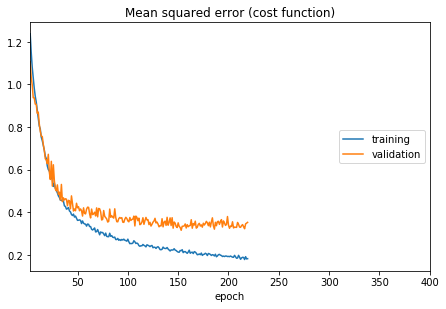

Mean squared error (cost function):
training   (min:    0.178, max:    1.577, cur:    0.182)
validation (min:    0.315, max:    1.560, cur:    0.353)
446/446 [==============================] - 101s 225ms/step - loss: 0.1822 - val_loss: 0.3527
Epoch 220/400
  2/446 [..............................] - ETA: 18:56 - loss: 0.2692

KeyboardInterrupt: 

In [57]:
fit = lambda: gen.fit( Dds.skip(3000).batch(100), validation_data=Dds.take(3000).batch(100), epochs=400,
                      callbacks=[PlotLossesCallback()], shuffle=False )
# models.base.fn_thread(gen, fit).control_panel()
fit()

In [ ]:
# TODO:
# save this image as:  STEP12_7_pBr2SXR_rm-rs_absarg_training_mse.png

In [ ]:
gen.layers[1].weights

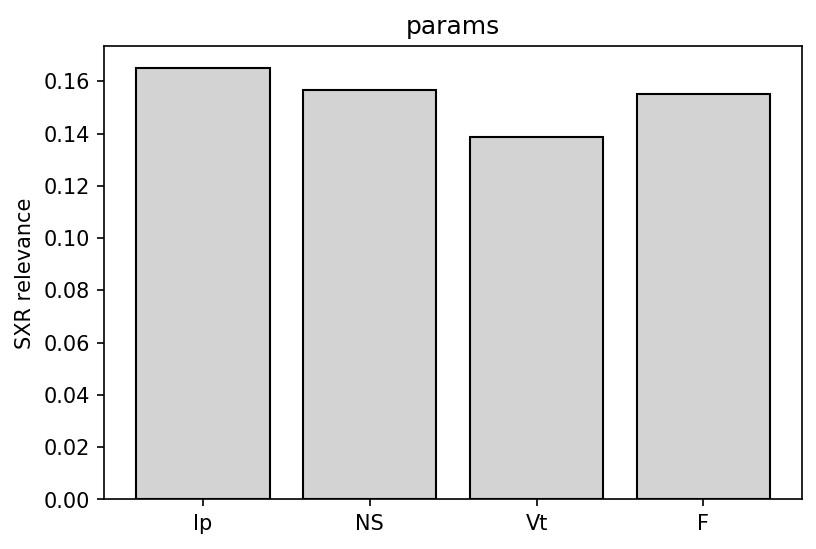

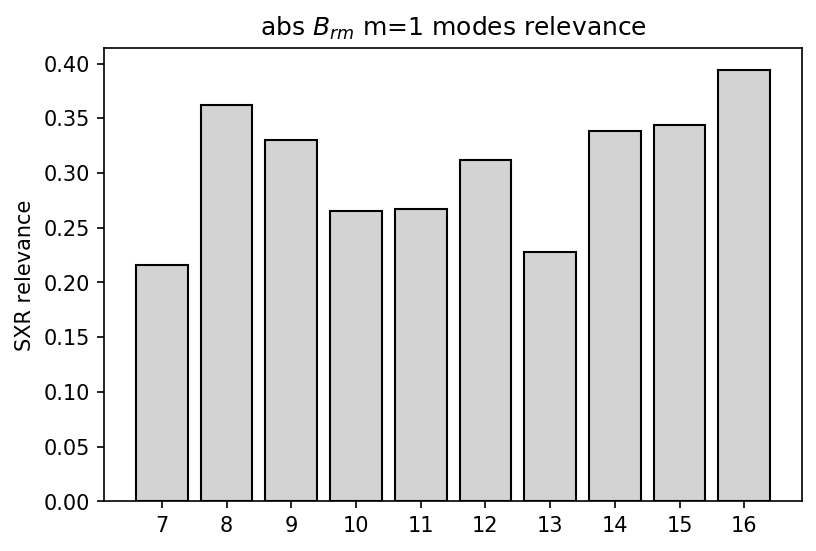

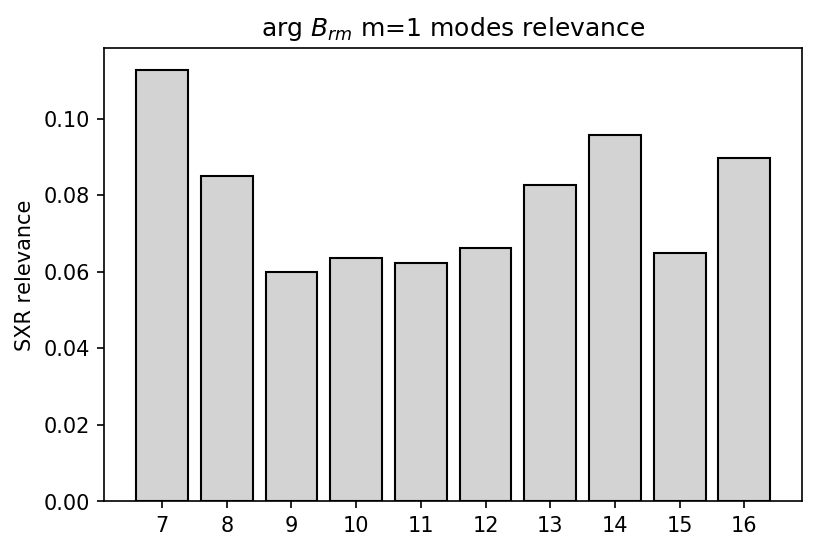

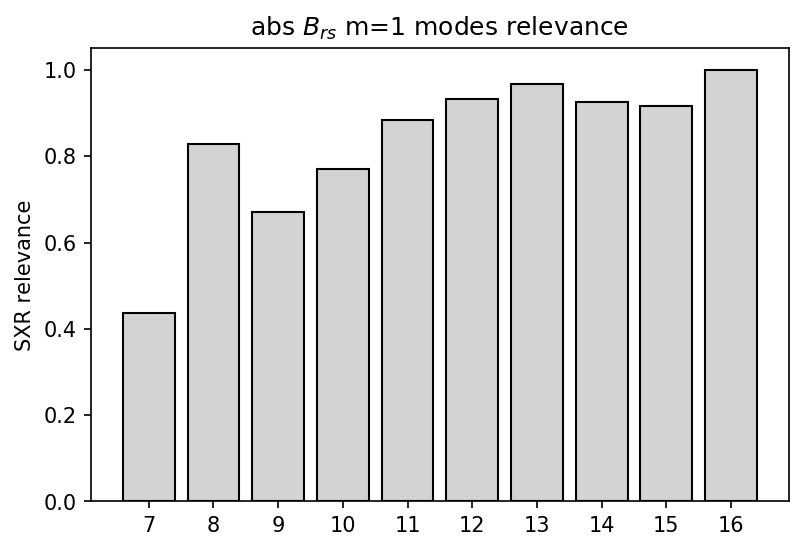

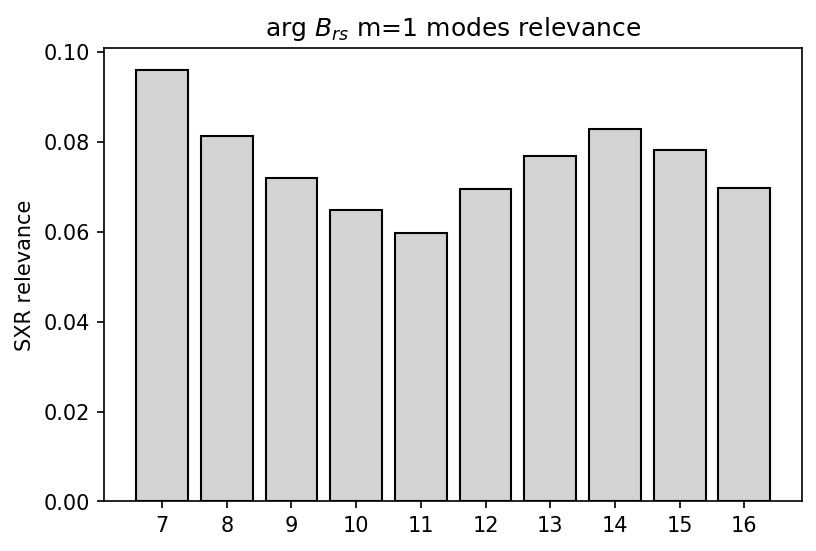

In [64]:
index = qsh[0].n
w = gen.layers[1].weights
%matplotlib inline

def plot_bar_x(index, w, title, w2=None):
    # this is for plotting purpose
    fig = plt.figure(title)
    fig.set_dpi(150)
    plt.bar(index, w, color='lightgrey', edgecolor='black')    
    plt.ylabel('SXR relevance', fontsize=10)
    plt.xticks(index, fontsize=10)
    plt.title(title)
    plt.show()

p,abs_Brm,arg_Brm,abs_Brs,arg_Brs = w[0][0:4],w[0][4:14], w[0][14:24], w[0][24:34], w[0][34:44]
plot_bar_x(['Ip','NS','Vt','F'], p, 'params')
plot_bar_x(index, abs_Brm, 'abs $B_{rm}$ m=1 modes relevance')
plot_bar_x(index, arg_Brm, 'arg $B_{rm}$ m=1 modes relevance')
plot_bar_x(index, abs_Brs, 'abs $B_{rs}$ m=1 modes relevance')
plot_bar_x(index, arg_Brs, 'arg $B_{rs}$ m=1 modes relevance')


In [58]:
vae1.save('step12_7_thesis')
# vae1.load('step12.7_p2ls_BrmBrs_abs-arg')

In [59]:
pos = 0

25


KeyboardInterrupt: 

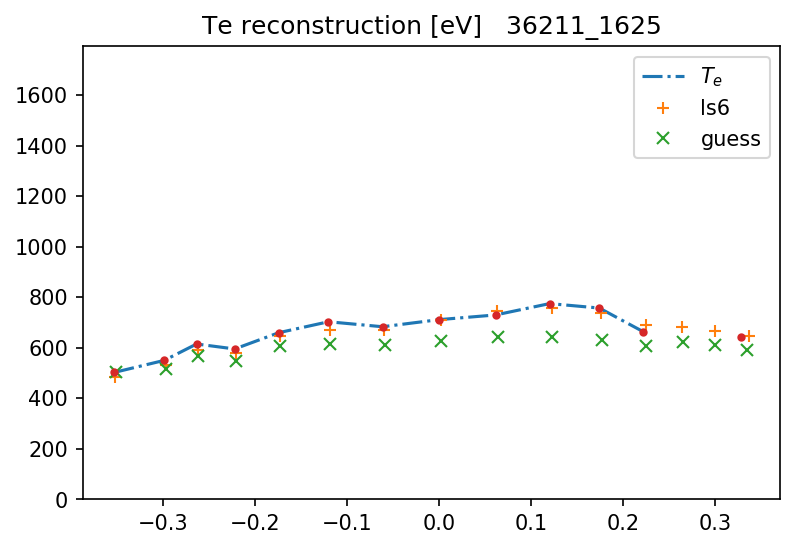

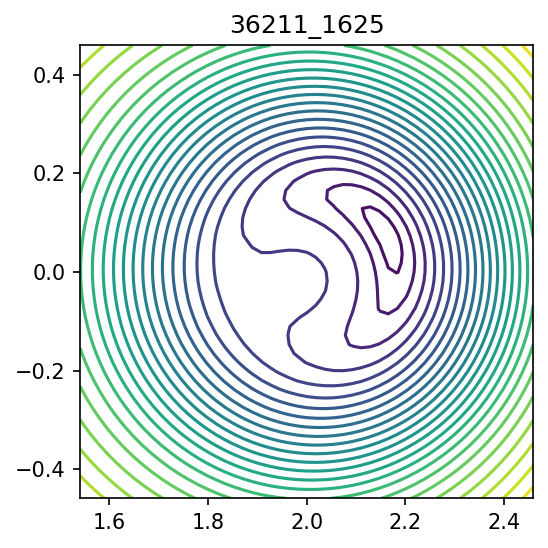

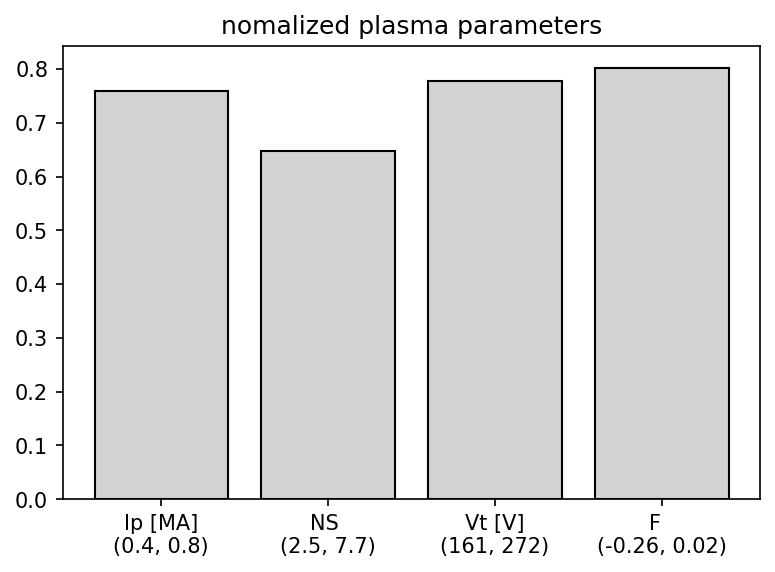

In [61]:
print(pos)


def un(x, min=0., max=2242.511):
    return min + x*(max-min)

def unx(x, min=-0.373, max=0.353):
    return min + x*(max-min)

def plot_tf(xy, name=None, h='.'):
    fig = plt.figure('plot')    
    fig.set_dpi(150)
    ax = plt.gca()    
    ax.set_ylim(0.,un(0.8))
    xy = tf.reshape(xy, [-1])
    x,y = tf.split(xy, num_or_size_splits=2, axis=0)
    plt.plot(unx(x),un(y),h, label=name)
    ax.legend()

def plot(x,y, name=None, h='.'):  
    fig = plt.figure('plot')    
    fig.set_dpi(150)
    ax = plt.gca()    
    ax.set_ylim(0.,un(0.8))
    plt.plot(unx(x),un(y), h, label=name)
    #ax.legend()
    
def plot_bar_x(index, w, title, w2=None):
    # this is for plotting purpose
    fig = plt.figure(title)
    plt.clf()
    fig.set_dpi(150)
    plt.bar(index, w, color='lightgrey', edgecolor='black')    
    # plt.ylabel('plasma parameters', fontsize=10)
    plt.xticks(index, fontsize=10)
    plt.title(title)
    return fig
    
def plot_te(pos):    
    d_pos = [x for x in ds.skip(pos).batch(1).take(1)][0]
    path = '/home/andrea/Documents/phd/Thesis/img/STEP12/STEP12_7d'
    p  = d_pos[0]
    xy = d_pos[1]

    fig = plt.figure('plot')
    plt.clf()
    # plt.text(0.05,0.7, '$I_p = %.2f$'%qsh[pos]['Ip'] )
    ax = plt.gca()
    ax.set_title( 'Te reconstruction [eV]   '+qsh[pos].label.decode("utf-8") )

    XY_vae = vae(xy, training=False)
    ls = gen(d_pos[0], training=False)
    XY = vae.decode(ls, training=False)
    # XY = tf.sigmoid(XY)
    plot_tf(xy, '$T_e$','-.')
    plot_tf(XY_vae, 'ls6','+')
    plot_tf(XY, 'guess','x')
    plot(qsh[pos]['prel'],qsh[pos]['te'], '$T_c$')

    fig2 = plt.figure('contour')
    plt.clf()
    ax2  = plt.gca()
    fig2.set_dpi(150)
    qsh[pos].plot_countour(ax=ax2)
    #ax2.set_title('SHeq')
    fig2.savefig( path+'/Contour_'+str(pos)+'.png')

    fig3 = plot_bar_x(['Ip [MA]\n(0.4, 0.8)',
                       'NS \n(2.5, 7.7)',
                       'Vt [V]\n(161, 272)',
                       'F  \n(-0.26, 0.02)'], qsh[pos]['Ip~NS~VT~F'], 'nomalized plasma parameters')
    fig3.savefig( path+'/Params_'+str(pos)+'.png')

    fig = plt.figure('plot')
    fig.savefig( path+'/Te_rec_'+str(pos)+'.png')

for pos in range(250):
    plot_te(pos)


In [62]:
loss = {
    'mse' : [],
    'sum_e' : [],
    'max' : [],
    'min' : [],
    'Ip' : [],
    'NS' : [],
    'Vt' : [],
    'F'  : [],
}
fig = plt.figure()

def un(x, min, max):
    return min + x*(max-min)

for i,d_pos in enumerate(ds.batch(300).take(10)):
    p  = d_pos[0]
    xy = d_pos[1]
    XY_vae = vae(xy, training=False)
    ls = gen(d_pos[0], training=False)
    XY = vae.decode(ls, training=False)
    
    mse = tf.losses.mse(XY_vae,XY)
    sum_e = tf.reduce_sum( (XY_vae-XY), axis=1) / 15
    max_e = tf.reduce_max( XY_vae-XY, axis=1) 
    min_e = tf.reduce_min( XY_vae-XY, axis=1) 
    # plot_tf(XY_vae, 'ls6','+')
    # plot_tf(XY, 'guess','x')
    for i in range(300):
        loss['mse'].append( un(mse[i].numpy(),0.,2242.511) )
        loss['sum_e'].append( un(sum_e[i].numpy(),0.,2242.511)  )
        loss['max'].append( un(max_e[i].numpy()-min_e[i].numpy(),0.,2242.511)  )
        loss['min'].append( un(min_e[i].numpy()-max_e[i].numpy(),0.,2242.511)  )
        loss['Ip'].append( un(p[i][0].numpy(),0.41,0.79) )
        loss['NS'].append( un(p[i][1].numpy(),2.55,7.69) )
        loss['Vt'].append( un(p[i][2].numpy(),161.15, 272.39) ) 
        loss['F'].append(p[i][3].numpy())
    

<Figure size 432x288 with 0 Axes>

norm (21.871697086213626, 84.48109601206244)
kurt 5.663973907349776
logistic (14.140440070593975, 42.44532839970533)


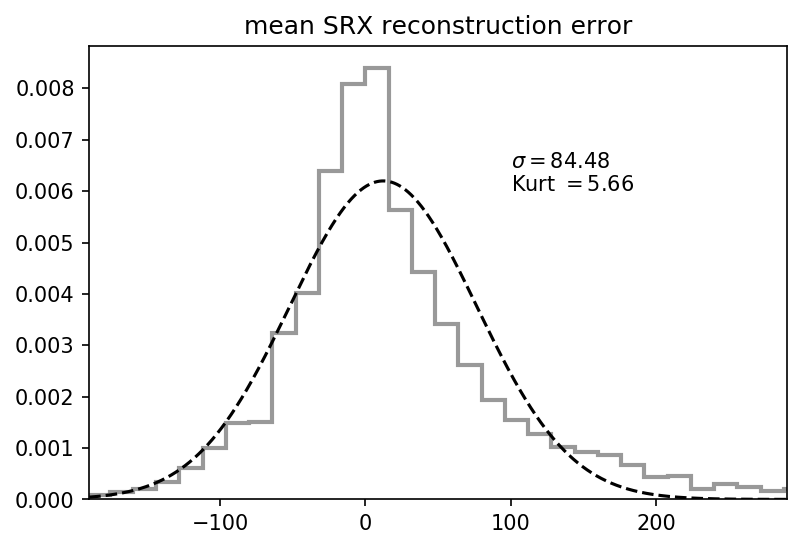

In [63]:
import seaborn as sns
from scipy import stats

#x = np.clip( np.array(loss['sum_e']), a_min=-200., a_max=200. )
lim = 400.
lim_f = 200.
x = np.array(loss['sum_e'])
X_in  = x[ (x > -lim_f) & (x < lim_f) ]
X_out = x[ (x < -lim_f) | (x > lim_f) ]

ax = sns.distplot( x, kde=False ,norm_hist=True, hist_kws={"range": [-lim,lim], "histtype": "step", "linewidth": 2, "color": "k"} );

xx = np.arange(-lim,lim, 0.1)
mu,std = stats.norm.fit(X_in)
yy = stats.norm.pdf(xx,mu,std)
ax.plot(xx,yy,'--k', label='norm')

# mu,std = stats.logistic.fit(x)
# yy = stats.logistic.pdf(xx,mu,std)
# ax.plot(xx,yy,'-.r', label='N_2')


fig = plt.gcf()
fig.set_dpi(150)
plt.xlim(-190,290)
#plt.legend()

ax.set_title('mean SRX reconstruction error')

plt.text(100,0.006,'$\sigma = %.2f$\nKurt $= %.2f$'%(x.std(),stats.kurtosis(x)))

print('norm',stats.norm.fit(x))
print('kurt',stats.kurtosis(x))
print('logistic',stats.logistic.fit(x))